<a href="https://colab.research.google.com/github/AlexBB999/THINK/blob/master/EXP_section_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Check for adequate sample sizes.

Check for changes over time in results.

Formally test for a significant difference in conversions between treatment and control groups.

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [0]:
ab=pd.read_csv('https://raw.githubusercontent.com/AlexBB999/Thinkful/master/ab_edited.csv')

In [0]:
PATH = 'https://raw.githubusercontent.com/nirupamaprv/Analyze-AB-test-Results/master/ab_edited.csv'
ab = pd.read_csv(PATH)

In [4]:
ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290585 entries, 0 to 290584
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.1+ MB


In [5]:
ab.head(10)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [8]:
ab['converted'].sum()

34753

In [0]:
ab[ab.group=='control'].converted

0         0
1         0
4         1
5         0
7         0
         ..
290578    0
290580    0
290581    0
290582    0
290583    0
Name: converted, Length: 145274, dtype: int64

In [0]:
control=ab[ab['group']=='control']

In [7]:
control.converted.sum()

17489

In [8]:
control.shape

(145274, 5)

In [0]:
treat=ab[ab['group']=='treatment']

In [10]:
treat.shape

(145311, 5)

WHAT IS CONVERSION RATE FOR EACH GROUP?

In [11]:
control_convert=control[control['converted']==1]
control_convert.shape

(17489, 5)

PERCENTAGE FOR CONTROL

In [12]:
pc=control_convert.shape[0]/control.shape[0]
print ('Conversions rate for control group = ',100*pc, '%')

Conversions rate for control group =  12.03863045004612 %


In [13]:
treat_convert=treat[treat['converted']==1]
treat_convert.shape

(17264, 5)

PERCENTAGE FOR TREATMENT

In [14]:
pt=treat_convert.shape[0]/treat.shape[0]
print ('Conversions rate for treatment group = ',100*pt, '%')

Conversions rate for treatment group =  11.880724790277405 %


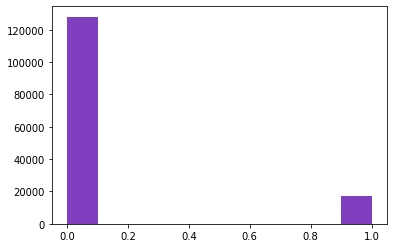

In [15]:
plt.hist(control['converted'], alpha = .5, color='r')
plt.hist(treat['converted'], alpha = .5,color='b')
plt.show()

In [16]:
stats.ttest_ind(control['converted'],treat['converted'])

Ttest_indResult(statistic=1.3116069027036805, pvalue=0.18965383906859376)

THIS IS WHERE I WENT WRONG

I TRIED TO ANALYZE BAsed ON TIMESTAMP

FINDING TWO ENETRIES WITH THE EXACT SAME TIMESTAMP IS ALMOST IMPOSSIBLE

I AM NOW FOLLOWING THE EXAMPLE AND PULLING JUST THE DATE OUT OF THE TIMESTAMP AS BELOW

In [0]:
ab['date'] = pd.DatetimeIndex(ab['timestamp']).date

In [20]:
ab.head()

,user_id,timestamp,group,landing_page,converted,date
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,2017-01-21
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,2017-01-12
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,2017-01-11
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,2017-01-08
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,2017-01-21


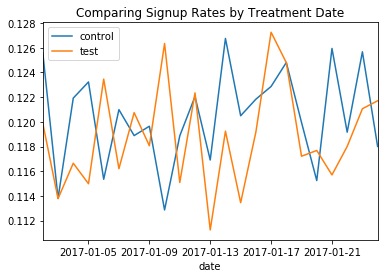

T-Test Results by Date
Ttest_indResult(statistic=1.8123288054674913, pvalue=0.0699579338988825)
Ttest_indResult(statistic=-0.05182821974845549, pvalue=0.9586663564605943)
Ttest_indResult(statistic=0.6795024407954999, pvalue=0.49683133482307695)
Ttest_indResult(statistic=-0.33111903181744556, pvalue=0.7405597598504309)
Ttest_indResult(statistic=-2.3999515991310387, pvalue=0.01641085244784032)
Ttest_indResult(statistic=0.4836129647924235, pvalue=0.628668638020595)
Ttest_indResult(statistic=-0.7611804663738991, pvalue=0.446562930057432)
Ttest_indResult(statistic=0.9315635899845935, pvalue=0.3515792521983202)
Ttest_indResult(statistic=1.261388402374626, pvalue=0.20719113309271808)
Ttest_indResult(statistic=0.0026642818202597274, pvalue=0.9978742538059032)
Ttest_indResult(statistic=0.28071255594768935, pvalue=0.7789352633524722)
Ttest_indResult(statistic=0.2056136446252576, pvalue=0.837095874040602)
Ttest_indResult(statistic=-0.4909032980527966, pvalue=0.6235093367111435)
Ttest_indResult(st

In [40]:
fig = ab[ab.group=='control'][
['date','converted']].groupby('date').mean().plot()

ab[ab.group=='treatment'][
['date','converted']].groupby('date').mean().plot(ax=fig)

plt.legend(['control', 'test'])
plt.title('Comparing Signup Rates by Treatment Date')
plt.show()

# Generate a test statistic comparing test and control on treatment date
print('T-Test Results by Date')

#for date in experiment_data.treatment_date.unique():


for date in ab.date.unique():
    dated_data = ab[ab.date == date]
    print(stats.ttest_ind(dated_data[dated_data.group == 'control'].converted,
                          dated_data[dated_data.group == 'treatment'].converted))
                        
    

pvalue and tvalue ==> reject null

In [0]:
fig = experiment_data[experiment_data.test==1][
    ['treatment_date', 'is_signed_up']].groupby('treatment_date').mean().plot()
experiment_data[experiment_data.test==0][
    ['treatment_date', 'is_signed_up']].groupby('treatment_date').mean().plot(ax=fig)
plt.legend(['test','control'])
plt.title('Comparing Signup Rates by Treatment Date')
plt.show()


# Generate a test statistic comparing test and control on treatment date
print('T-Test Results by Date')
for date in experiment_data.treatment_date.unique():
    dated_data = experiment_data[experiment_data.treatment_date == date]
    print(stats.ttest_ind(dated_data[dated_data.test == 1].is_signed_up,
                          dated_data[dated_data.test == 0].is_signed_up))


IGNORE STUFF BELOW LINE

==============================================================================

In [0]:
stats.ttest_ind(experiment_data[experiment_data.test == 1].is_signed_up,
                experiment_data[experiment_data.test == 0].is_signed_up

In [0]:
stats.ttest_ind([experiment_data.group == 'control'].is_signed_up,
                experiment_data[experiment_data.test == 0].is_signed_up

In [0]:
#ab[ab.group == 'control'].converted

In [23]:
ab[ab.group=='control'][['timestamp','converted']]


,timestamp,converted
0,2017-01-21 22:11:48.556739,0
1,2017-01-12 08:01:45.159739,0
4,2017-01-21 01:52:26.210827,1
5,2017-01-10 15:20:49.083499,0
7,2017-01-17 01:48:29.539573,0
...,...,...
290578,2017-01-21 22:44:20.378320,0
290580,2017-01-03 22:28:38.630509,0
290581,2017-01-12 00:51:57.078372,0
290582,2017-01-22 11:45:03.439544,0
